In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import pickle
import time
import datetime
import tensorflow as tf
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB # classifier 
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# text preprocessing modules
from string import punctuation 
# text preprocessing modules
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import re #regular expression
# Download dependency
for dependency in (
    "brown",
    "names",
    "wordnet",
    "averaged_perceptron_tagger",
    "universal_tagset",
):
    nltk.download(dependency)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')    

Mounted at /content/gdrive


In [ ]:
df = pd.read_pickle('/content/gdrive/MyDrive/bigcleantrainp5.pkl')

In [ ]:
df

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,label,clean_text
0,593336,0.166667,What a breathe of fresh air to have someone wh...,0.0,0.0,0.000000,0.166667,0.000000,NaN,NaN,...,0,0,0,4,0,0.0,0,6,0,what a breathe of fresh air to have someone wh...
1,5407051,0.000000,Possible collusion by Trump and his affiliates...,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,...,0,0,0,1,0,0.0,0,4,0,possible collusion by trump and his affiliate ...
2,5808132,0.000000,Exactly. We need a % of GDP spending cap at t...,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,...,0,0,0,7,0,0.0,0,4,0,exactly we need a of gdp spending cap at the f...
3,557013,0.000000,"By your own comment, even if some of them vote...",0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,...,0,0,0,1,0,0.0,0,4,0,by your own comment even if some of them voted...
4,5174718,0.000000,My thought too. If they care so much for it th...,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,...,0,0,0,9,1,0.0,0,4,0,my thought too if they care so much for it the...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643635,5987909,0.500000,Mueller was only suppose to investigate the el...,0.0,0.1,0.100000,0.000000,0.400000,NaN,NaN,...,0,0,0,1,0,0.1,0,10,1,mueller wa only suppose to investigate the ele...
643636,933951,0.800000,He should put her on a plane with a one way ti...,0.0,0.0,0.200000,0.500000,0.100000,NaN,NaN,...,0,0,0,3,2,0.0,0,10,1,he should put her on a plane with a one way ti...
643637,5735026,0.600000,Fat boy hits that button it will be his last t...,0.1,0.0,0.400000,0.200000,0.600000,NaN,NaN,...,0,1,3,9,5,0.0,0,10,1,fat boy hit that button it will be his last ti...
643638,5776486,0.833333,Just condemn White people and you'll be fine.,0.0,0.0,0.833333,0.166667,0.166667,0.0,0.0,...,0,0,0,0,0,0.0,4,6,1,just condemn white people and youll be fine


In [ ]:
X = df["clean_text"]
y = df['label']

In [ ]:
# split data into train and validate
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=42,
    shuffle=True,
    stratify=y,
)

In [ ]:
sentiment_classifier = Pipeline(steps=[
                               ('pre_processing',TfidfVectorizer(lowercase=False)),
                                 ('naive_bayes',MultinomialNB())
                                 ])

In [ ]:
sentiment_classifier.fit(X_train,y_train)

Pipeline(steps=[('pre_processing', TfidfVectorizer(lowercase=False)),
                ('naive_bayes', MultinomialNB())])

In [ ]:
y_preds = sentiment_classifier.predict(X_valid)

In [ ]:
accuracy_score(y_valid,y_preds)

0.8363215462059537

In [ ]:
print(classification_report(y_valid, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82     32182
           1       0.79      0.91      0.85     32182

    accuracy                           0.84     64364
   macro avg       0.84      0.84      0.84     64364
weighted avg       0.84      0.84      0.84     64364



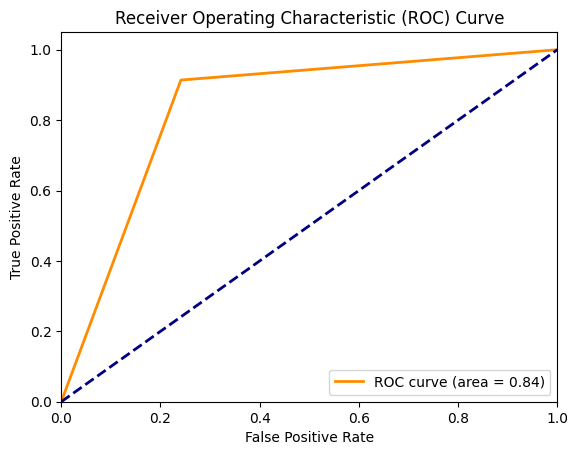

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_valid, y_preds)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

In [ ]:
pickle.dump(sentiment_classifier, open("/content/gdrive/MyDrive/bayes.pkl", "wb"))